Test for part a:
[1 1 1 0]
17
Part b:
[-1.0, -0.8, -0.6, -0.4, -0.19999999999999996, 0.0, 0.19999999999999996, 0.3999999999999999, 0.6000000000000001, 0.8, 1.0]


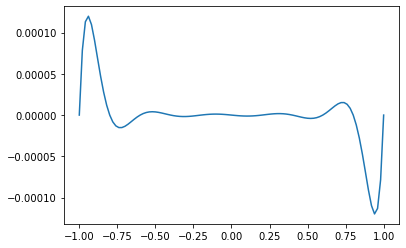

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def coeff(x, y):

    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])
    return a

def poly(x_data, y_data, x):
    
    a = coeff(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p

#test let f(x) = 1 + x^2
print("Test for part a:")
x = ([0,1,2,3])
y = ([1,2,5,10])

co = coeff(x,y)
print(co)
val = poly(x,y,4)
print(val)

print("Part b:")
xj = []
for i in range(0,11):
    xj.append(-1+i*2/10)
print(xj)
    
f = []
for i in range(0,11):
    f.append(xj[i]*np.exp(xj[i]*xj[i]))
    
xbar = []
for i in range(0,101):
    xbar.append(-1+i*2/100)

f2 = []
for i in range(0,101):
    f2.append(xbar[i]*np.exp(xbar[i]*xbar[i]))

d = np.array(xbar)

p10 = poly(xj, f, d)

plt.plot(xbar,f2-p10)


In [122]:
def naturalSpline(x,y):
    n = len(x)-1
    a = np.copy(y)
    h = np.diff(x)
    A = np.zeros(n)
    for i in range(0,n):
        A[i+1] = 3/h[i+1] * (a[i+1+1]-a[i+1]) - 3/h[i] * (a[i+1] - a[i])
    l[1] = 1
    u[1] = 0
    z[1] = 0
    for i in range(0,n-1):
        l[i+1] = 2 * (x[i+1+1]-x[i-1+1]) - h[i-1+1]*u[i-1+1]
        u[i+1] = h[i+1] / l[i+1]
        z[i+1] = (A[i+1] - h[i-1+1])*z[i-1+1] / l[i+1]
    l[n+1] = 1
    z[n+1] = 0
    c[n+1] = 0
    for j in range(n-1,-1,0):
        c[j+1] = z[j+1] - u[j+1]*c[j+1+1]
        b[j+1] = (a[j+1+1]-a[j+1]) / h[j+1]-h[j+1]*(C[j+1+1] + 2*c[j+1])/3
        d[j+1] = (c[j+1+1]-c[j+1]) / (3*h[j+1])
    a = a[1:n]
    b = b[1:n]
    c = c[1:n]
    d = d[1:n]
    return ([a,b,c,d])

IndexError: index 8 is out of bounds for axis 0 with size 8

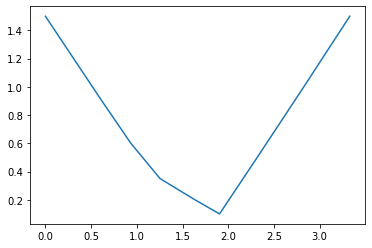

In [127]:
t=([0,0.618,0.935,1.255,1.636,1.905,2.317,2.827,3.33])
x=([1.5,0.9,0.6,0.35,0.2,0.1,0.5,1,1.5])
y=([0.75,0.9,1,0.8,0.45,0.2,0.1,0.2,0.25])
([a1,b1,c1,d1]) = naturalSpline(x,y)
([a2,b2,c2,d2]) = naturalSpline(t,y)
for j in range(0,7):
    if z <= t[j+1]:
        u = d1[j]*(z-t[j])**3 +c1[j]*(z-t[j])**2+b1[j]*(z-t[j])+a1[j]
        v = d2[j]*(z-t[j])**3 +c2[j]*(z-t[j])**2+b2[j]*(z-t[j])+a2[j]
plt.plot(u,v)